# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime

Data can be accessed from this google drive link. The "play log" contains the records of users active session. There are 9 mini games inside the app "Lengbear", an social casino games made and publish exclusively for Cambodia. The transactions log is the records of user in app purchase.

In [2]:
# Columns name for player log, transactions and match length by GameID provided by data owner

columns_play_log=('Sequence','UserID', 'GameID', 'Level', 'WinNo', 'DrawNo', 'LostNo', 'WinAmt', 'LostAmt', 'Date', 'Currency_Type1', 'Currency_Type2')
columns_transactions=('UserID','Amount','Chips','Date', 'Channel')

In [3]:
#making the dataframe for GameID and Match_Length (data provided by game owner)

#define BINH                9001: 80 seconds
#define POKDENG             9002: 80 seconds
#define BAUCUA              9005: 20 seconds
#define SHOW                9004: 80 seconds
#define XOCDIA              9003: 20 seconds
#define SIKU                9006: 80 seconds
#define SLOT_20_LINE        9008: 20 seconds
#define SLOT_100_LINE       1008: 20 seconds
#define TIENLEN_CAM         9009: 120 seconds

Game_Code_Length=pd.DataFrame({'GameID':[9001, 9002, 9005, 9004, 9003, 9006, 9008, 1008, 9009],
                               'Match_Length':[75,75,20,75,20,75,20,20,120]})
Game_Code_Length

,GameID,Match_Length
0,9001,75
1,9002,75
2,9005,20
3,9004,75
4,9003,20
5,9006,75
6,9008,20
7,1008,20
8,9009,120


In [4]:
# Load the play log file and check if there is any missing values

play_log_df=pd.read_csv('data/PlayerLog.csv', names=columns_play_log)
play_log_df.isna().sum()

Sequence          0
UserID            0
GameID            0
Level             0
WinNo             0
DrawNo            0
LostNo            0
WinAmt            0
LostAmt           0
Date              0
Currency_Type1    0
Currency_Type2    0
dtype: int64

In [5]:
# Load the transactions log data and check if there is any missing values

transactions_df=pd.read_csv('data/TransactionLog.csv', names=columns_transactions)
transactions_df.isna().sum()

UserID     0
Amount     0
Chips      0
Date       0
Channel    0
dtype: int64

In [6]:
# Getting the right format for date in transaction data

transactions_df['Date']=pd.to_datetime(transactions_df['Date'].str[:10])

In [7]:
# Remove redundant columns (suggested by data owner) and set the time to regular format

play_log_df.drop(['Sequence','Currency_Type1','Currency_Type2'], axis=1, inplace=True)
play_log_df['Date']=pd.to_datetime(play_log_df['Date'].str[:10])
play_log_df.head()

,UserID,GameID,Level,WinNo,DrawNo,LostNo,WinAmt,LostAmt,Date
0,5894561,9009,1000,0,0,1,0,24964,2020-05-09
1,6047531,9009,20,2,0,0,515,0,2020-05-09
2,4972744,9009,100,1,0,3,1748,7800,2020-05-09
3,5608136,9009,1000,9,0,15,128680,137000,2020-05-09
4,4725768,9009,100,10,0,34,18272,27100,2020-05-09


In [8]:
# Getting the Match_Length column ready to calculate the active session of user.

play_log_df=play_log_df.merge(Game_Code_Length, on='GameID', how='left')
play_log_df.head()

,UserID,GameID,Level,WinNo,DrawNo,LostNo,WinAmt,LostAmt,Date,Match_Length
0,5894561,9009,1000,0,0,1,0,24964,2020-05-09,120
1,6047531,9009,20,2,0,0,515,0,2020-05-09,120
2,4972744,9009,100,1,0,3,1748,7800,2020-05-09,120
3,5608136,9009,1000,9,0,15,128680,137000,2020-05-09,120
4,4725768,9009,100,10,0,34,18272,27100,2020-05-09,120


In [9]:
# Counting the number of games play in each log and get the actual active play time of users.

play_log_df['Games_Played']=play_log_df['WinNo']+play_log_df['DrawNo']+play_log_df['LostNo']
play_log_df['Active_Time']=play_log_df['Games_Played']*play_log_df['Match_Length']
play_log_df

,UserID,GameID,Level,WinNo,DrawNo,LostNo,WinAmt,LostAmt,Date,Match_Length,Games_Played,Active_Time
0,5894561,9009,1000,0,0,1,0,24964,2020-05-09,120,1,120
1,6047531,9009,20,2,0,0,515,0,2020-05-09,120,2,240
2,4972744,9009,100,1,0,3,1748,7800,2020-05-09,120,4,480
3,5608136,9009,1000,9,0,15,128680,137000,2020-05-09,120,24,2880
4,4725768,9009,100,10,0,34,18272,27100,2020-05-09,120,44,5280
...,...,...,...,...,...,...,...,...,...,...,...,...
1768635,4969001,9009,20,2,0,0,1435,0,2020-05-10,120,2,240
1768636,812253,9009,5000,0,0,3,0,335000,2020-05-10,120,3,360
1768637,6037451,9009,20,0,0,1,0,294,2020-05-10,120,1,120
1768638,4449836,9009,5000,0,0,1,0,135000,2020-05-10,120,1,120


In [10]:
# Getting t0 and list of days on which user data can be extracted

t0=play_log_df['Date'].min()
t_value=[]

for i in range(0,9):
    t_value.append(t0+datetime.timedelta(days=i))
    
print(f'The data set can have t0 can start from: {t_value[0]}, to: {t_value[-1]}, pass t_value[number] to function get_data to get the desired player data')

The data set can have t0 can start from: 2020-05-01 00:00:00, to: 2020-05-09 00:00:00, pass t_value[number] to function get_data to get the desired player data


In [11]:
def get_data(t0):
    
    # Pass in t0, t4 and tchurn
    t0=t0
    t4=t0+datetime.timedelta(days=3)
    tchurn=t0+datetime.timedelta(days=4)
    print(f't0={t0} \nt4={t4} \ntchurn={tchurn}')
    
    # Get unique users on t0
    play_log_t0=play_log_df.loc[play_log_df['Date']==t0]
    t0_users=pd.DataFrame(play_log_t0['UserID'].unique())
    t0_users.columns=['UserID']
    
    # Slice out the dataframe that contains user playlog from t0 -> t4
    play_log_t0_t4=play_log_df.loc[(play_log_df['Date']>=t0) & (play_log_df['Date']<=t4)]
    
    # Compute the Winning rate and Drawing rate, Losing Rate, Winning Amount, Losing Amount for each user in from t0->t4
    WinNo=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['WinNo'])
    DrawNo=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['DrawNo'])
    LostNo=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['LostNo'])
    WinAmt=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['WinAmt'])
    LostAmt=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['LostAmt'])
    Games_Played=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['Games_Played'])
    Active_Time=pd.DataFrame(play_log_t0_t4.groupby(['UserID']).sum()['Active_Time'])
    
    # Merging user data into a single dataframe 
    play_log_summary=WinNo.merge(DrawNo, on='UserID', how='left')\
                        .merge(LostNo, on='UserID', how='left')\
                        .merge(WinAmt, on='UserID', how='left')\
                        .merge(LostAmt, on='UserID', how='left')\
                        .merge(Games_Played, on='UserID', how='left')\
                        .merge(Active_Time, on='UserID', how='left')
    play_log_summary.columns=['WinNo', 'DrawNo', 'LostNo', 'WinAmt', 'LostAmt', 'Games_Played', 'Active_Time']
    
    # Reset index after merging all new 
    play_log_summary=play_log_summary.reset_index(level='UserID')
        
    # Slice out the time for study
    transactions_df_t0_t4=transactions_df.loc[(transactions_df['Date']>=t0) & (transactions_df['Date']<=t4)]
    
    # Sum in-game purchase by users during t0 -> t4
    transactions_df_t0_t4=pd.DataFrame(transactions_df_t0_t4.groupby(['UserID']).sum()['Amount'])
    transactions_df_t0_t4.reset_index(level='UserID')
    
    # Merge transactions records with play log
    play_log_summary=play_log_summary.merge(transactions_df_t0_t4, on='UserID', how='left')
    play_log_summary=play_log_summary.fillna(0)
    
    # Create new features namely: Winning Rate, Drawing Rate, Losing Rate for all unique users
    play_log_summary['WinningRate']=play_log_summary['WinNo']/play_log_summary['Games_Played']
    play_log_summary['DrawRate']=play_log_summary['DrawNo']/play_log_summary['Games_Played']
    play_log_summary['LosingRate']=play_log_summary['LostNo']/play_log_summary['Games_Played']
    
    # Slice out tchurn
    play_log_tchurn=play_log_df.loc[play_log_df['Date']==tchurn]
    
    # Getting target 
    final_play_log=play_log_summary.assign(Churn=play_log_summary.UserID.isin(play_log_tchurn.UserID).astype(int))

    return final_play_log

In [12]:
play_log_train=get_data(t_value[0])
play_log_train

t0=2020-05-01 00:00:00 
t4=2020-05-04 00:00:00 
tchurn=2020-05-05 00:00:00


,UserID,WinNo,DrawNo,LostNo,WinAmt,LostAmt,Games_Played,Active_Time,Amount,WinningRate,DrawRate,LosingRate,Churn
0,1980,0,0,3,0,417197,3,60,0.2,0.000000,0.0,1.000000,0
1,3452,7,0,12,6800050,8971800,19,1095,0.0,0.368421,0.0,0.631579,1
2,3700,73,0,72,18404347,21637393,145,10765,2.0,0.503448,0.0,0.496552,1
3,4079,10,0,13,10639687,17156250,23,1725,0.0,0.434783,0.0,0.565217,0
4,4732,3,0,12,10726,52726,15,1125,0.0,0.200000,0.0,0.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118805,5986120,4,0,22,8400,18000,26,520,0.0,0.153846,0.0,0.846154,0
118806,5986122,2,0,1,476,876,3,225,0.0,0.666667,0.0,0.333333,1
118807,5986131,3,0,6,7500,4590,9,180,0.0,0.333333,0.0,0.666667,1
118808,5986132,1,0,2,100,130,3,60,0.0,0.333333,0.0,0.666667,1


AttributeError: 'DataFrame' object has no attribute 'unique'

# Correlation with churn

In [14]:
play_log_df.corr().style.background_gradient()

,UserID,GameID,Level,WinNo,DrawNo,LostNo,WinAmt,LostAmt,Match_Length,Games_Played,Active_Time
UserID,1.000000,-0.019892,-0.066279,-0.022627,nan,-0.030673,-0.045419,-0.047102,-0.060496,-0.029573,-0.027013
GameID,-0.019892,1.000000,-0.018684,-0.076436,nan,-0.139091,0.000197,-0.000004,0.359621,-0.127733,0.019294
Level,-0.066279,-0.018684,1.000000,0.023687,nan,0.016064,0.239252,0.261220,-0.052492,0.018370,0.014081
WinNo,-0.022627,-0.076436,0.023687,1.000000,nan,0.851288,0.190399,0.177562,-0.049228,0.911341,0.836991
DrawNo,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
LostNo,-0.030673,-0.139091,0.016064,0.851288,nan,1.000000,0.129723,0.126613,-0.087411,0.991807,0.631980
WinAmt,-0.045419,0.000197,0.239252,0.190399,nan,0.129723,1.000000,0.951299,0.009474,0.148130,0.211561
LostAmt,-0.047102,-0.000004,0.261220,0.177562,nan,0.126613,0.951299,1.000000,0.007655,0.142564,0.201689
Match_Length,-0.060496,0.359621,-0.052492,-0.049228,nan,-0.087411,0.009474,0.007655,1.000000,-0.080564,0.177603
Games_Played,-0.029573,-0.127733,0.018370,0.911341,nan,0.991807,0.148130,0.142564,-0.080564,1.000000,0.699597


In [15]:
# Assigning X_train and y_train
X_train=play_log_train.iloc[:,:-1]
X_train=X_train.drop(['UserID'], axis=1)

# Fill na for some value of 
X_train=X_train.fillna(0) 
X_train.shape

(118810, 11)

In [16]:
y_train=play_log_train.iloc[:,-1]

In [17]:
y_train.value_counts()

0    80464
1    38346
Name: Churn, dtype: int64

## Clearly, this is an imbalance data set which can result in inaccuracy for classification models. We will resample the data sets to make it more balance.

In [18]:
from sklearn.utils import resample

In [19]:

print('Number of class 0 examples before:', X_train[y_train == 0].shape[0])

X_downsampled, y_downsampled = resample(X_train[y_train == 0], 
                                        y_train[y_train == 0], 
                                        replace=True, 
                                        n_samples=X_train[y_train == 1].shape[0], 
                                        random_state=42)

print('Number of class 0 examples after:', X_downsampled.shape[0])

# Combine upsample with original data
X_train_downsampled = np.vstack((X_train[y_train == 1], X_downsampled))
y_train_downsampled = np.hstack((y_train[y_train == 1], y_downsampled))

Number of class 0 examples before: 80464
Number of class 0 examples after: 38346


In [20]:
# Get a new set of users as the test set 

play_log_test=get_data(t_value[6])
play_log_test

t0=2020-05-07 00:00:00 
t4=2020-05-10 00:00:00 
tchurn=2020-05-11 00:00:00


,UserID,WinNo,DrawNo,LostNo,WinAmt,LostAmt,Games_Played,Active_Time,Amount,WinningRate,DrawRate,LosingRate,Churn
0,123,0,0,1,0,5700,1,75,0.0,0.000000,0.0,1.000000,0
1,1406,0,0,2,0,7000,2,150,0.0,0.000000,0.0,1.000000,0
2,3452,5,0,8,3378423,5006784,13,535,0.0,0.384615,0.0,0.615385,1
3,3700,1,0,4,32555,364044,5,375,0.0,0.200000,0.0,0.800000,1
4,4891,37,0,47,329163,322689,84,6245,0.0,0.440476,0.0,0.559524,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109343,6064980,1,0,1,1170,10000,2,40,0.0,0.500000,0.0,0.500000,0
109344,6064985,1,0,1,92,300,2,150,0.0,0.500000,0.0,0.500000,1
109345,6064986,0,0,1,0,900,1,75,0.0,0.000000,0.0,1.000000,1
109346,6064993,1,0,5,21000,24400,6,120,0.0,0.166667,0.0,0.833333,1


In [21]:
# Assigning X_test and y_test
X_test=play_log_test.iloc[:,:-1]
X_test=X_test.drop(['UserID'], axis=1)

# Fill na for some value of 
X_test=X_test.fillna(0) 

In [22]:
y_test=play_log_test.iloc[:,-1]
y_test.value_counts()

0    69097
1    40251
Name: Churn, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression

# 1. Instantiate model
churn_logistic_regression=LogisticRegression(random_state=42, max_iter=10000)

# 2. Fit model
churn_logistic_regression.fit(X_train_downsampled, y_train_downsampled)

LogisticRegression(max_iter=10000, random_state=42)

In [24]:
# 3. Score model
print(f'Score on train: {churn_logistic_regression.score(X_train_downsampled, y_train_downsampled)}')
print(f'Score on test: {churn_logistic_regression.score(X_test, y_test)}')

Score on train: 0.4998956866426746
Score on test: 0.36823718769433367


In [25]:
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier(random_state=42, max_depth=11)
DT.fit(X_train, y_train)

# Accuracy scores
print(DT.score(X_train_downsampled, y_train_downsampled))
print(DT.score(X_test, y_test))

0.7299066395451937
0.7330083769250466


In [26]:
from sklearn.neighbors import KNeighborsClassifier

# k_ranges = range(1,15)
# train_scores = []
# validation_scores = []

# for k in k_ranges:
my_knn = KNeighborsClassifier(n_neighbors=13)
my_knn.fit(X_train, y_train)
    
# train_scores.append(my_knn.score(X_train, y_train))
# validation_scores.append(my_knn.score(X_test, y_test))

print(my_knn.score(X_train_downsampled, y_train_downsampled))
print(my_knn.score(X_test, y_test))

0.7328274135503051
0.7080605040787211


In [27]:
from sklearn.ensemble import RandomForestClassifier

estimator_number = list(range(1, 100))
train_scores = []
test_scores = []


for number in estimator_number:
    my_model = RandomForestClassifier(n_estimators=number, 
                                      max_depth=1,
                                      random_state=1)
    my_model.fit(X_train_downsampled, y_train_downsampled)

    train_scores.append(my_model.score(X_train_downsampled, y_train_downsampled))
    test_scores.append(my_model.score(X_test, y_test))
    
    print(f'finished {number} estimators', end='\r')

finished 9 estimatorsfinished 10 estimatorsfinished 11 estimatorsfinished 12 estimatorsfinished 13 estimatorsfinished 14 estimatorsfinished 15 estimatorsfinished 16 estimatorsfinished 17 estimatorsfinished 18 estimatorsfinished 19 estimatorsfinished 20 estimatorsfinished 21 estimatorsfinished 22 estimatorsfinished 23 estimatorsfinished 24 estimatorsfinished 25 estimatorsfinished 26 estimatorsfinished 27 estimatorsfinished 28 estimatorsfinished 29 estimatorsfinished 30 estimatorsfinished 31 estimatorsfinished 32 estimatorsfinished 33 estimatorsfinished 34 estimatorsfinished 35 estimatorsfinished 36 estimatorsfinished 37 estimatorsfinished 38 estimatorsfinished 39 estimatorsfinished 40 estimatorsfinished 41 estimatorsfinished 42 estimatorsfinished 43 estimatorsfinished 44 estimatorsfinished 45 estimatorsfinished 46 estimatorsfinished 47 estimatorsfinished 48 estimatorsfinished 49 estimatorsfinished 50 estimatorsfinished 51 estimatorsfinished 52 estimatorsfinished 53 estimatorsfinished 54

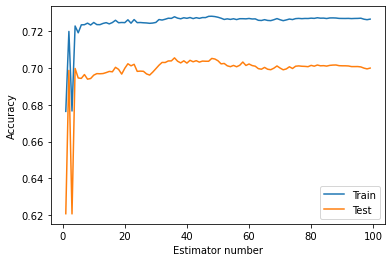

In [39]:
plt.figure()
plt.plot(estimator_number, train_scores, label="Train")
plt.plot(estimator_number, test_scores, label="Test")
plt.xlabel("Estimator number")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [40]:
from sklearn.neural_network import MLPClassifier

In [31]:
my_skl_model = MLPClassifier(hidden_layer_sizes=(10), 
                             activation='relu',
                             max_iter=2000,
                             solver = 'adam')

In [32]:
# 3. Fit
my_skl_model.fit(X_train_downsampled, y_train_downsampled)

MLPClassifier(hidden_layer_sizes=10, max_iter=2000)

In [33]:
# 3. Score
print(my_skl_model.score(X_train_downsampled, y_train_downsampled))
print(my_skl_model.score(X_test, y_test))

0.6782063318207896
0.6630025240516516


In [34]:
# importing the feed-forward network object
from tensorflow.keras.models import Sequential

# importing the required type of layers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [35]:
# Instantiate feed-forward neural network
my_keras_model = Sequential()

In [36]:
# adding appropriate layers

# hidden layer with relu activation function and 10 nodes
my_keras_model.add(Dense(units=10, 
                         activation='relu', 
                         input_shape=(11,))) 
# shape of data points come in the model
# the next layer you dont need to put in input_shape
# output layer with softmax and 3 output nodes
my_keras_model.add(Dense(units=2,
                         activation='softmax')) #classification problem use softmax

In [37]:
# compile model with proper optimizer, loss and a metric
my_keras_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy']) #loss function is what we want to optimize

In [38]:
# fit model 
my_keras_model.fit(X_train_downsampled, y_train_downsampled, epochs=2000, verbose=0) 
# epoch is the number of iteration, 
# verbose stops the function printing everytime it finishes one iteration 

KeyboardInterrupt: 

In [46]:
# training score
my_keras_model.evaluate(X_train_downsampled, y_train_downsampled)

ValueError: Error when checking input: expected dense_input to have shape (4,) but got array with shape (11,)

In [ ]:
# testing score
my_keras_model.evaluate(X_test, y_test)